<a href="https://colab.research.google.com/github/vixerica0726/desafiosPythonPandas/blob/main/desafioNetflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Squad Katherine Johnson

Bárbara Cravo da

Erica Felix De Oliveira

Gisele Lika Harano

Iasmim Campos Moreira

Leticia Coelho Rosa

Luana Schmitz

Paula de Almeida Freitas

# Desafio - O perfil do Catálogo da Netflix

Esse desafio tem como objetivo responder algumas perguntas através da
análise de dados, aprofundando o conhecimento em frequência e medidas.

Os dados que deverão ser utilizado nesse script foram baixados do kaggle,
e podem ser acessados através do link:
https://www.kaggle.com/code/shivamb/netflix-shows-and-movies-exploratory-analysis

Este conjunto de dados consiste na lista de filmes e suas respectivas e
suas informações.

Variáveis:

● show_id - id único do filme/série.

● title - título do filme ou série

● director - diretor do filme ou série

● cast - elenco do filme ou série

● country - país do filme ou série

● date_added - data que foi adicionado no Netflix

● reading score - ano de lançamento original do filme

● rating - classificação da televisão

● duration - duração total do filme ou série.

● listed_in - categoria ou gênero do filme ou série.

● description -descrição do filme ou série.

● type - tipo de filme ou série
Os dados são arquivos em .csv.


In [16]:
# Importação de bibliotecas para manipulação de dados e visualização
import pandas as pd  # Manipular os dados
import numpy as np  # Operações matemáticas
import matplotlib.pyplot as plt  # Criar gráficos
import seaborn as sns  # Criar gráficos mais avançados

from google.colab import files  # Para fazer upload do arquivo no Colab

# Solicita o upload do arquivo CSV
print("Faça o upload do arquivo de dados:")
uploaded = files.upload()

# Ler o arquivo CSV e armazenar no DataFrame dfNet
dfNet = pd.read_csv('netflix_titles_nov_2019.csv')

# Mostra as 10 primeiras linhas do dataset para entender a estrutura dos dados
dfNet.head(10)


Faça o upload do arquivo de dados:


Saving netflix_titles_nov_2019.csv to netflix_titles_nov_2019 (1).csv


,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie
7,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,"November 29, 2019",2016,TV-MA,107 min,"Dramas, International Movies",The life and times of iconic South African lib...,Movie
8,70205672,La Reina del Sur,NaN,"Kate del Castillo, Cristina Urgel, Alberto Jim...","United States, Spain, Colombia, Mexico",NaN,2019,TV-14,2 Seasons,"Crime TV Shows, International TV Shows, Spanis...",This compelling show tells the story of the le...,TV Show
9,81172841,Lagos Real Fake Life,Mike Ezuruonye,"Nonso Diobi, Mike Ezuruonye, Mercy Aigbe, Rex ...",NaN,"November 29, 2019",2018,TV-14,118 min,"Comedies, International Movies",Two mooching friends vie for the attention of ...,Movie


# 1. Exploração inicial:
 Quantas linhas e colunas tem o dataset?

 Quais são os tipos das variáveis e se há valores ausentes?

In [23]:
# Verificando a quantidade total de linhas e colunas no dataset
print(f"O dataset tem {dfNet.shape[0]} linhas e {dfNet.shape[1]} colunas.")
# .shape retorna as dimensões (linhas, colunas) do DataFrame

print("\nTipos das variáveis e valores ausentes:")
dfNet.info()
# .info() exibe os tipos de dados e a quantidade de valores não nulos por coluna

print("\nQuantidade de valores ausentes por coluna:")
print(dfNet.isnull().sum())
# .isnull().sum() conta o número de valores ausentes (NaN) por coluna

'''
director tem 1901 valores ausentes, indicando muitas produções sem essa informação.
cast tem 556 ausentes, ou seja, alguns títulos não registram o elenco.
country tem 427 ausentes, mostrando que nem todos têm país de origem informado.
date_added tem 642 ausentes, sem a data de adição para algumas produções.
rating tem 10 ausentes, enquanto duration não possui valores faltantes.
Colunas como title, release_year, listed_in, description e type estão completas.
A maioria dos dados está bem preenchida, mas director e cast possuem muitas ausências, o que pode exigir tratamento antes da análise
'''


O dataset tem 5837 linhas e 12 colunas.

Tipos das variáveis e valores ausentes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB

Quantidade de valores ausentes por coluna:
show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
r

## 2. Análises de frequência:
Qual a proporção de filmes vs. séries no catálogo

Qual o gênero mais frequente?

In [26]:
# Conta a quantidade de filmes e séries no catálogo
print("\nProporção de Filmes vs. Séries:")
print(dfNet['type'].value_counts(normalize=True) * 100)  # porcentagem de cada tipo

# Analisa os gêneros mais frequentes
print("\nGênero mais frequente:")
generos = dfNet['listed_in'].str.split(', ', expand=True).stack()  # Separa os gêneros e organiza os dados
print(generos.value_counts().idxmax())  # gênero mais comum


# Isso significa que 67,48% dos títulos no catálogo da Netflix são filmes, enquanto 32,52% são séries.
# Ou seja, há mais filmes do que séries na plataforma, quase o dobro de filmes.
# O gênero mais comum na Netflix é "International Movies".
# Isso indica que a plataforma tem muitos filmes estrangeiros, ou seja, produções de diversos países ao redor do mundo.



Proporção de Filmes vs. Séries:
type
Movie      67.483296
TV Show    32.516704
Name: proportion, dtype: float64

Gênero mais frequente:
International Movies


## 3. Análises estatísticas:

Qual a média, mediana e moda do tempo de duração dos
filmes?

Qual o filme mais curto e mais longo?

In [34]:
# Remover valores que não são números de duração
dfNet['duration'] = dfNet['duration'].astype(str).str.replace(' min', '')  # Converte os valores para string e remove 'min' da duração
dfNet['duration'] = pd.to_numeric(dfNet['duration'], errors='coerce')  # Converte para valores numéricos, colocando NaN em valores inválidos

# Verificar se há valores nulos após a conversão
print("\nValores nulos após conversão:")
print(dfNet['duration'].isnull().sum())  # Conta quantos valores nulos (NaN) existem na coluna 'duration'

# Calcular média, mediana e moda do tempo de duração dos filmes
print("\nMédia, Mediana e Moda da Duração dos Filmes:")
print(f"Média: {dfNet['duration'].mean()} minutos")  # Calcula a média da coluna 'duration'
print(f"Mediana: {dfNet['duration'].median()} minutos")  # Calcula a mediana da coluna 'duration'
print(f"Moda: {dfNet['duration'].mode()[0]} minutos")  # Calcula a moda da coluna 'duration' e pega o primeiro valor por haver múltiplos

# Encontrar o filme mais curto e o mais longo
filme_mais_curto = dfNet[dfNet['duration'] == dfNet['duration'].min()]  # Filtra o filme com a menor duração
filme_mais_longo = dfNet[dfNet['duration'] == dfNet['duration'].max()]  # Filtra o filme com a maior duração

print("\nFilme mais curto:")
print(filme_mais_curto[['title', 'duration']])  # Exibe o título e a duração do filme mais curto

print("\nFilme mais longo:")
print(filme_mais_longo[['title', 'duration']])  # Exibe o título e a duração do filme mais longo

# (Média)Isso significa que, se todas as durações fossem distribuídas igualmente,
# cada filme teria cerca de 98 minutos.

#(Mediana) Nesse caso, a mediana é 97 minutos, o que mostra que metade dos filmes
# dura menos de 97 min e metade dura mais.

#  A moda é o valor mais comum na lista de durações, ou seja, o tempo de filme
# que aparece com mais frequência.



Valores nulos após conversão:
1898

Média, Mediana e Moda da Duração dos Filmes:
Média: 98.02919522721503 minutos
Mediana: 97.0 minutos
Moda: 90.0 minutos

Filme mais curto:
       title  duration
1185  Silent       3.0

Filme mais longo:
                           title  duration
2160  Black Mirror: Bandersnatch     312.0


##4. Visualização de dados:

Criar um gráfico de barras para mostrar a quantidade de títulos
por gênero.

Criar um histograma para analisar a distribuição da duração dos
filmes.


<ipython-input-12-42ca22a4b433>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_generos.values, y=contagem_generos.index, palette="viridis")


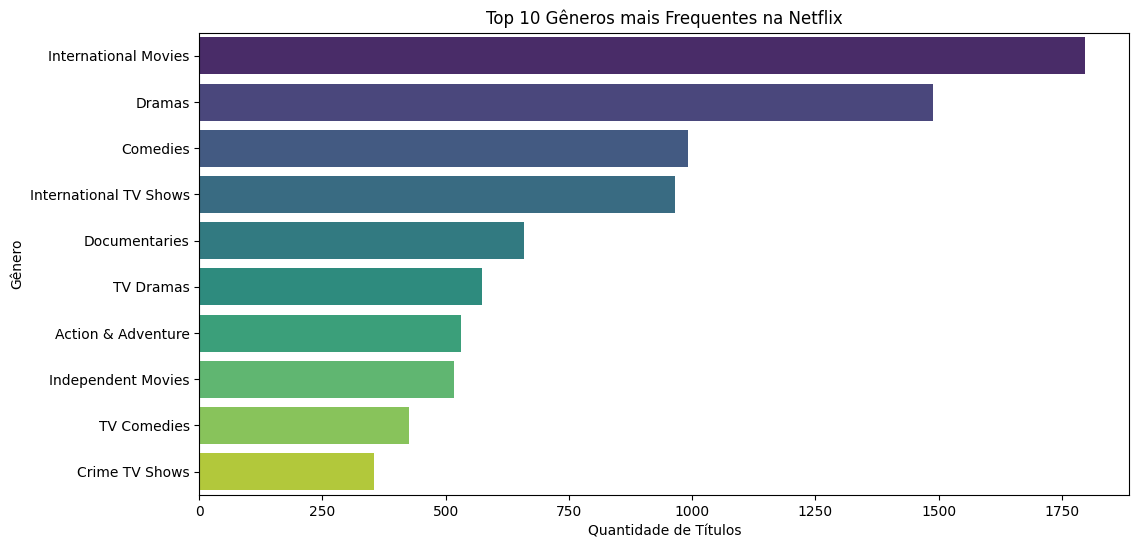

In [12]:
# Contar a frequência de cada gênero
generos = dfNet['listed_in'].str.split(', ', expand=True).stack()  # Separar os gêneros
contagem_generos = generos.value_counts().head(10)  # Top 10 gêneros mais comuns

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=contagem_generos.values, y=contagem_generos.index, palette="viridis")
plt.xlabel("Quantidade de Títulos")
plt.ylabel("Gênero")
plt.title("Top 10 Gêneros mais Frequentes na Netflix")
plt.show()


# Mostra a quantidade de títulos (filmes e séries) em cada gênero. O gráfico ajuda
# a identificar quais gêneros dominam o catálogo da Netflix. Quanto maior a barra,
#  mais títulos existem naquele gênero.



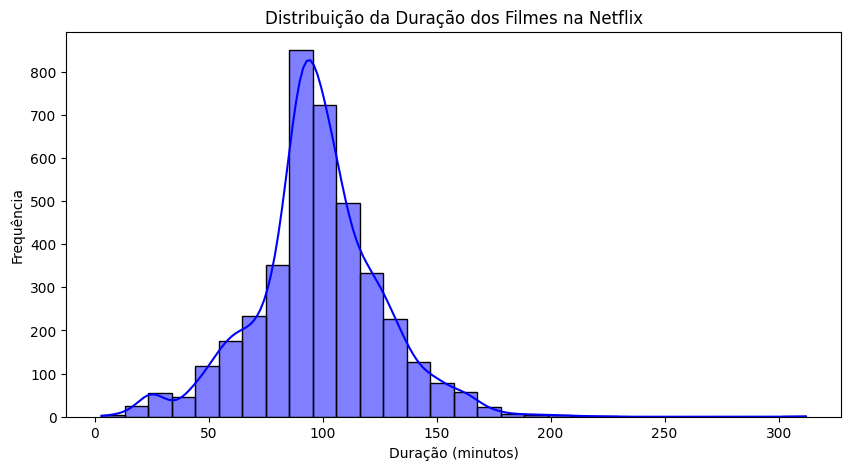

In [13]:
# Filtrar apenas os filmes e remover valores nulos
duracao_filmes = dfNet[dfNet['type'] == 'Movie']['duration'].dropna()

# Criar o histograma
plt.figure(figsize=(10, 5))
sns.histplot(duracao_filmes, bins=30, kde=True, color='blue')  # kde=True para suavizar a curva
plt.xlabel("Duração (minutos)")
plt.ylabel("Frequência")
plt.title("Distribuição da Duração dos Filmes na Netflix")
plt.show()


# O histograma é útil para ver como os dados (duração dos filmes) estão distribuídos
# ao longo de diferentes intervalos. Ele permite identificar padrões, como se a maioria
# dos filmes tem uma duração curta ou longa, e ajuda a visualizar a frequência de filmes em diferentes durações.

# Eixo X (horizontal): Representa os intervalos de duração dos filmes, geralmente em minutos (por exemplo, 0-30 min, 30-60 min, 60-90 min).
# Eixo Y (vertical): Indica a frequência, ou seja, o número de filmes que pertencem a cada intervalo.



## Atividade extra:

Quais são os 5 países que possuem mais produções no catálogo?

In [14]:
# Conta quantas produções existem por país
top_paises = dfNet['country'].value_counts().head(5)

# Exibi os 5 países com mais produções
print("\nTop 5 países com mais produções no catálogo:")
print(top_paises)


# O código usa value_counts() para contar quantas produções existem em cada país e
# head(5) para pegar os 5 países com mais títulos.
# Isso revela que os EUA lideram o catálogo da Netflix, seguidos por Índia,
# Reino Unido, Canadá e França. Isso pode indicar que esses países produzem mais
#conteúdo ou que a Netflix tem mais contratos de distribuição com eles.



Top 5 países com mais produções no catálogo:
country
United States     1907
India              697
United Kingdom     336
Japan              168
Canada             139
Name: count, dtype: int64
